In [157]:
import matplotlib.pyplot as plt
import librosa
import librosa.display
import skimage.io
import numpy as np
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from tensorflow.keras.applications.vgg16 import preprocess_input, decode_predictions

In [158]:
model = load_model('model.h5')

In [159]:
# file_name = 'YAF_bite_neutral.wav'
# file_name = 'YAF_beg_disgust.wav'
# file_name = 'YAF_burn_angry.wav'
# file_name = 'OAF_bar_fear.wav'
# file_name = 'OAF_book_sad.wav'
# file_name = 'SAM_burn_angry.webm'
file_name = 'SAM_bite_neutral.webm'

graph_name = f'{file_name}_graph.png'

In [160]:
y, sr = librosa.load(f'./sounds/{file_name}', res_type='kaiser_fast')
mfccs = librosa.feature.mfcc(y=y, sr=sr, n_mfcc=40)
skimage.io.imsave(f'./sounds/graphs/{graph_name}', mfccs)

/home/sam/.local/lib/python3.10/site-packages/librosa/util/decorators.py:88: UserWarning: PySoundFile failed. Trying audioread instead.
  return f(*args, **kwargs)
Lossy conversion from float32 to uint8. Range [-645.0076293945312, 234.93994140625]. Convert image to uint8 prior to saving to suppress this warning.


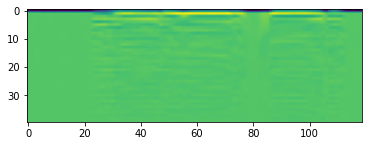

In [161]:
plt.imshow(plt.imread(f'./sounds/graphs/{graph_name}'))
plt.show()

In [162]:
image = load_img(f'./sounds/graphs/{graph_name}', target_size=(224, 224))
image = img_to_array(image)
image = image.reshape((1, image.shape[0], image.shape[1], image.shape[2]))
image = preprocess_input(image)

In [163]:
pred = model.predict(image)

1/1 [==============================] - 0s 337ms/step


In [164]:
classes = ['angry', 'disgust', 'fear', 'happy', 'neutral', 'ps', 'sad']
y_pred = np.argmax(pred, axis=1)
print(y_pred)
print(classes[y_pred[0]])

[5]
ps
